In [29]:
from glob import glob
from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kurtosis
import matplotlib.pyplot as plt

In [2]:
csv_targets = pd.read_csv('../data/z-stacks/logistic_targets.csv')
csv_targets = csv_targets.drop([1, 10])[["index"]].to_numpy() # drop index 7 and 16 (at row 1 and 10), because their images are too small.

In [30]:
image_paths = glob(f"../data/preprocessed/resized/500/z-stacks/**/*.bmp")
cleaned_image_paths = []
for path in image_paths:
    try:
        if int(path.split('/')[6]) not in csv_targets:
            continue
        cleaned_image_paths.append(path)
    except:
        continue


In [31]:
stack = np.zeros((500, 500, len(cleaned_image_paths)))
to_remove = []
for i, path in enumerate(tqdm(cleaned_image_paths)):
    img = Image.open(path)
    img_data = np.asarray(img)
    stack[:, :, i] = img_data

100%|██████████| 1693/1693 [00:15<00:00, 112.16it/s]


In [32]:
# Remove empty slices
stack_cleaned = np.delete(stack, to_remove, axis=2)

In [34]:
stack_mean = stack.mean(axis=2)
stack_std = stack.std(axis=2)

[]

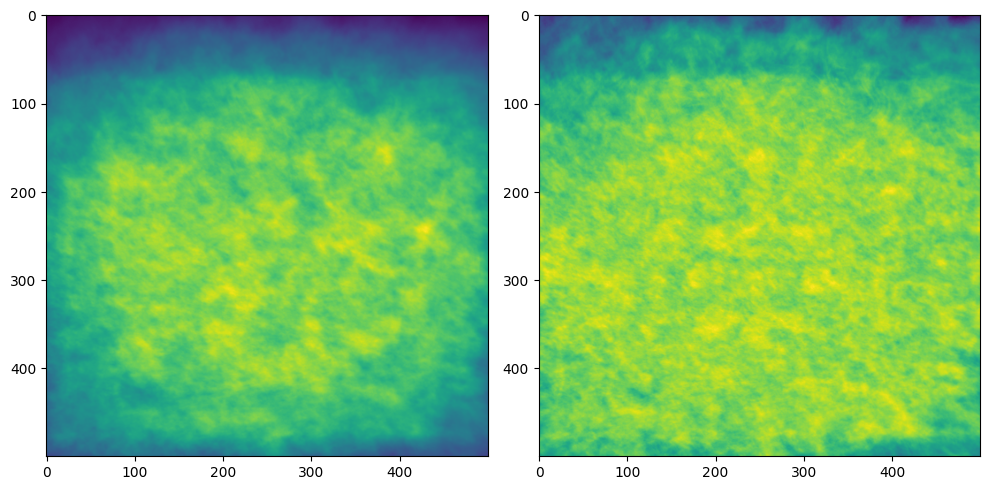

In [35]:
fig = plt.figure(figsize=(10, 10), tight_layout=True)

ax1, ax2 = fig.subplots(1, 2)
ax1.imshow(stack_mean)
ax2.imshow(stack_std)
plt.plot()

In [6]:
np.save('outputs/stats/cleaned_stack.npy', stack_cleaned)

In [ ]:
stack_cleaned = np.load('outputs/stats/cleaned_stack.npy')

In [7]:
kur = kurtosis(stack_cleaned, axis=3)

: 

: 

In [ ]:
ax = plt.subplot()
ax.plot(kur)

In [42]:
# The mean of the whole dataset is
np.mean(stack_cleaned, axis=(0, 1, 3))

array([3.80627821e+01, 0.00000000e+00, 1.24499975e-02])

In [43]:
# The standard deviation of the whole dataset is
np.std(stack_cleaned, axis=(0, 1, 3))

array([42.51551508,  0.        ,  0.19324445])

In [48]:
# This cell crashes the kernel, but is what I want to do... Subtract the mean and divide by std.
# mean = np.array([3.80627821e+01, 0.00000000e+00, 1.24499975e-02])[None, None, ..., None]
# std = np.array([42.51551508,  0.        ,  0.19324445])[None, None, ..., None]
# normed_stack_cleaned = (stack_cleaned - mean) / std

: 

: 

In [45]:
hist, edges = np.histogram(stack_cleaned[:, :, 0, :], bins='auto')

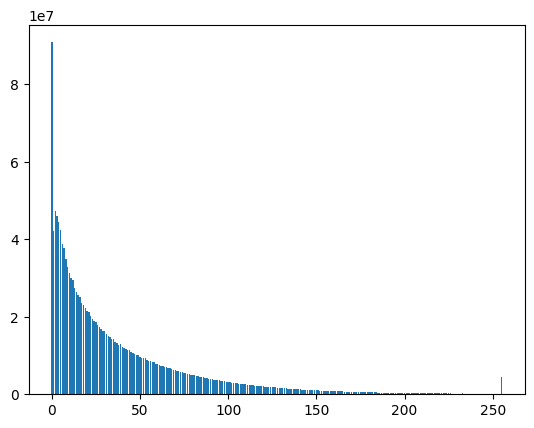

In [47]:
_ = plt.bar(edges[:-1], hist)

Find code to Yeo-Johnson normalize all images and normalize them below.

In [4]:
from glob import glob
import numpy as np
from PIL import Image
import os
from scipy import stats

In [17]:
image_paths = glob(f"../data/preprocessed/z-stacks/**/*.bmp")
output_path = "../data/normalized/z-stacks"

In [18]:
def yeo_johnson_and_normalize_all(image_paths: list[str], output_path: str, lmbda: float, mean: float, std: float) -> None:
    """Equalizes all images selected with a list of image paths using CLAHE.
    
    The output path must not contain a trailing "/".
    """
    from tqdm import tqdm

    for path in tqdm(image_paths):
        stack_id = path.split('/')[-2]
        slice_fn = path.split('/')[-1].split('.')[0]

        # Read image from file
        img_pil = Image.open(path)
        img = np.asarray(img_pil)

        img_transformed = stats.yeojohnson(img, lmbda)
        img_normalized = (img_transformed - mean) / std
        
        if not os.path.exists(f"{output_path}/{stack_id}"):
            os.makedirs(f"{output_path}/{stack_id}")

        img_out = Image.fromarray(img_normalized)
        img_out.save(f"{output_path}/{stack_id}/{slice_fn}.tif")

In [19]:
yeo_johnson_and_normalize_all(image_paths, output_path, 0.466319593487972, 14.716653741103862, 6.557034596034911)

100%|██████████| 1905/1905 [03:57<00:00,  8.02it/s]
